In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve,auc,classification_report,accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt

Dans ce tp on va voir la capacité d'apprentissage ainsi la performance des modèles AFD et SVM dans le context de la classification.
Pour se mettre dans le context, la méthode de SVM et principalement basée sur trouver l'équation optimale du l'hyperplan : $$ w^T X -b=0$$ pour une equation de la droite $$y=ax+b$$ qui en fait se transforme en :$$ Ax+By+C=0$$ avec $$ w=\begin{pmatrix} A \\ B\end{pmatrix}$$ et et $$X=\begin{pmatrix} x \\ y\end{pmatrix}$$
qui en fait a deux support lignes parallèles donc leurs formes standards:$$w^T X -b=-1$$
$$w^T X -b=0 $$
$$w^T X -b=1$$ qui se sont intervenus de la normalisation de $$ Ax+By+C=0$$

par trouver le k par: $$k(Ax+By+C=0)=1$$

$$$$
 et l'objectif et de maximiser le plus possible le width entre ces deux lignes, c'est pour cela on doit maximiser cette distance: $$d=\frac{|C2-C1|}{\sqrt{A^2 + B^2}}$$ avec C1 et C2 se sont les support vectors.
 $$$$
D'ailleurs on a la méthode de LDA ou AFD qui est aussi de la classification mais on l'applique dans un espace de 2 dimensions,et qui cherche à faire la projection qui maximise la séparation des classes:$$y = w^T x + b$$
et utilise la matrice de covariance qui est:$$St=Sw+Sb$$ avec Sw matrice de covariance qui mesure la dispersion de points dans les classes, et Sb matrice de covariance qui mesure la separation des moyennes entre les classes.
Et e critere de LDA et de calculer le rapport $$ J(w)= \frac{w^T S_W w}{w^T S_W w} $$.

In [ ]:
#creer jeu de data
##DATA:creditcardfraud
!kaggle datasets download -d mlg-ulb/creditcardfraud

!unzip creditcardfraud.zip

import pandas as pd
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows
df.head(20)


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 86% 57.0M/66.0M [00:00<00:00, 170MB/s]
100% 66.0M/66.0M [00:00<00:00, 167MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [ ]:
lda_model=LinearDiscriminantAnalysis()
svm_model=SVC()

lda_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
y_lda_pred=lda_model.predict(X_test)
y_svm_pred=svm_model.predict(X_test)
print("y_afd=",y_lda_pred)
print("y_svm=",y_svm_pred)
print("y_afd=",y_lda_pred.tolist())
print("y_svm=",y_svm_pred.tolist())

y_afd= [1 0 0 ... 0 0 0]
y_svm= [0 0 0 ... 0 0 0]
y_afd= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
rapport_afd=classification_report(y_test,y_lda_pred)
rapport_svm=classification_report(y_test,y_svm_pred)
print("rapport_afd: ",rapport_afd)
print("rapport_svm :",rapport_svm)

rapport_afd:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.79      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

rapport_svm :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
tpr_lda,fpr_lda,tresholds=roc_curve(y_test,y_lda_pred)
tpr_svm,fpr_svm,tresholds=roc_curve(y_test,y_svm_pred)
roc_auc_lda=auc(fpr_lda,tpr_lda)
roc_auc_svm=auc(fpr_svm,tpr_svm)
print("roc_auc_afd: ",roc_auc_lda)
print("roc_auc_svm: ",roc_auc_svm)


roc_auc_afd:  0.10672900954959218
roc_auc_svm:  0.5


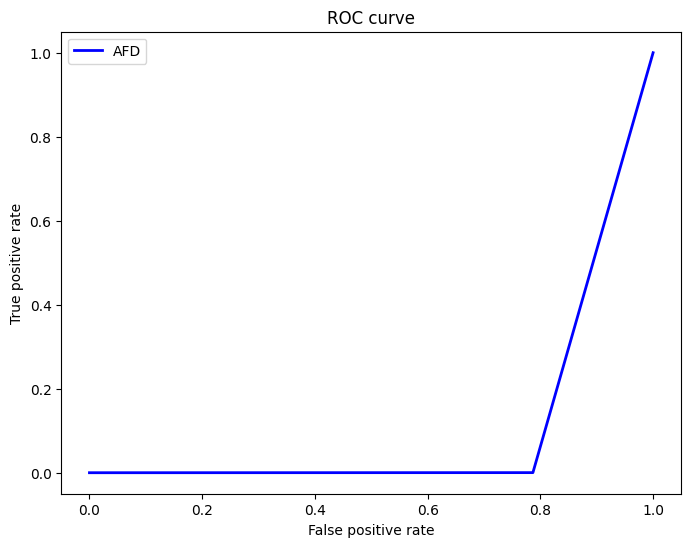

In [ ]:
if not callable(plt.xlabel):
  import importlib
  importlib.reload(plt)
  print("has been reloaded")
plt.figure(figsize=(8,6))
plt.plot(fpr_lda,tpr_lda,lw=2,color='blue',label='AFD')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

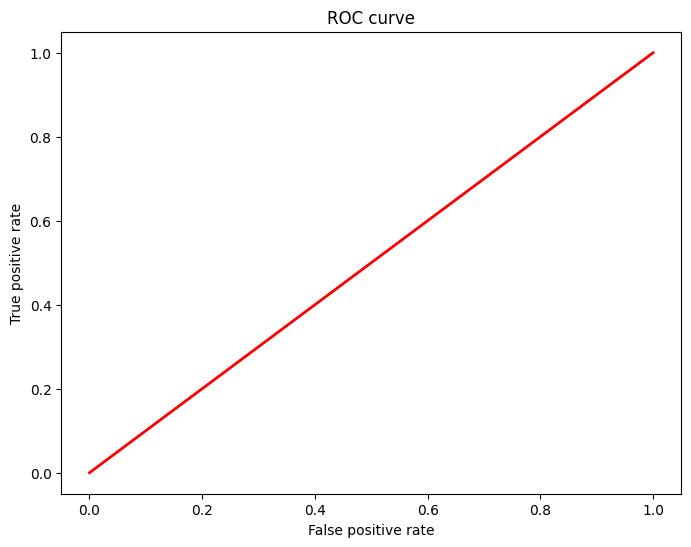

In [ ]:
plt.figure(figsize=(8,6))
if not callable(plt.xlabel):
  import importlib
  importlib.reload(plt)
  print("has been reloaded")
plt.plot(fpr_svm,tpr_svm,lw=2,color='red',label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

##Discussion sur les resultats

Dans ce tp, on remarque bien que les données sont désiquilibrés ce qui fait nous avons obtenu des prédictions qui sont dans la classes négative (non fraduleux).

Remarquons les résultats concernant la classification on voit que l'AFD a pu classifier/detecter au plus une transaction qui est fraduleux par contre le SVM a classifie dans la classe negative qui est non fraduleux, et donc on peut dire que puisque on a les données sont désiquilibrées alors le SVM aprenne à préviligier la classe majoritaire.

Ainsi pour le rapport des deux modèles on remarque pour le modèele de **l'AFD** **:---**   la précision dans la classe 1 indique que à chaque fois je veux classifier les données à la classe 0 il y a **15%** seront dans la classe 1;
**---**le recall indique que tous les vrais exemples se sont identifiés par le modèle parfaitement pour la classe 0,
**mais 21%** des données se sont à tort classifiées dans la classe 0 et qu'elles doivent dans la classe 1.

pour le modèle de **SVM** on a : **---**la précision dans la classe 1 qui est de 0.00 indique que le modèle a jamais prédit correctement la classe 1 et donc tous les exemples de la classe 1 sont classifiés dans 0;
     **----**pour le recall pour la classe 0 est parfait, mais pour la classe 1 indique qu'il n'a pas detecté un seul vrai exemple de la classe 1.

Pour les deux courbes; **AFD:** on peut dire que c'est à cause de la dominance de la classe 0 donc une fois le seuil de décision diminue il commence à identifier les vrais positive mais aussi plus de faux positifs;
**pour le SVM:**on a un diagonale ce qui signifie que le modèle est aléatoire et il est difficile de distinguer entre les classes.

Mais on remarque bien que l'auc de la svm et mieux que afd ce qui suppose que la svm a comme meme une performance.

les metriques pour chque modele:

In [ ]:
acc_lda=accuracy_score(y_test,y_lda_pred)
acc_svm=accuracy_score(y_test,y_svm_pred)
print("acc_afd: ",acc_lda)
print("acc_svm: ",acc_svm)

f1_score_lda=f1_score(y_test,y_lda_pred)
f1_score_svm=f1_score(y_test,y_svm_pred)
print("f1_score_afd: ",f1_score_lda)
print("f1_score_svm: ",f1_score_svm)

precision_lda=precision_score(y_test,y_lda_pred)
precision_svm=precision_score(y_test,y_svm_pred)
print("precision_afd: ",precision_lda)
print("precision_svm: ",precision_svm)

recall_lda=recall_score(y_test,y_lda_pred)
recall_svm=recall_score(y_test,y_svm_pred)
print("recall_afd: ",recall_lda)
print("recall_svm: ",recall_svm)

acc_afd:  0.9994382219725431
acc_svm:  0.9984082955888721
f1_score_afd:  0.816793893129771
f1_score_svm:  0.0
precision_afd:  0.8492063492063492
precision_svm:  0.0
recall_afd:  0.7867647058823529
recall_svm:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voyons les exactitudes des deux modeles on peut dire les deux ont correctement fait la prédiction les deux classes (à savoir qu'on voit bien l'exactitude de la LDA et plus importante que celle de SVM), mais elle se peut tromper car elle se peut perfomer bien sur la classe majoritaire.

pour les f1score pour le SVM on peut dire que le modele a mal à apprendre la relation entre la classe positive et les caractéristiques.

pour les précisions on a 85% des prédictions se sont correctement classifiés dans AFD, mais pour le SVM, il semble qu'il ne fait aucune prédition correcte.

pour les rappels on voit que l'AFD a réussit à identifier 79% des exemples positifs mais pour le SVM semble ignorer toute la classe positive comme elle est négative.

Enfin on peut aussi ameliorer cette dataset pour qu'elle soit bien equilibré on peut utiliser la méthode de SMOTE qui en fait augmente artificiellement le nombre d'exemple de la classe minoritaire pour permettre au modèle à apprendre mieux à cette classe.